In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image.shape

(28, 28)

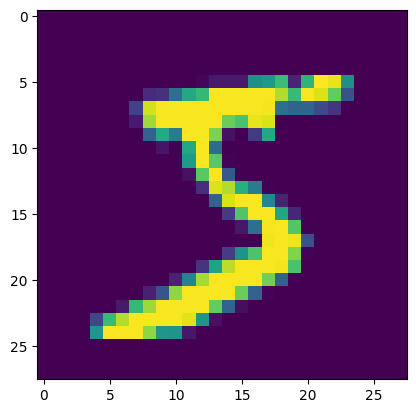

In [ ]:
plt.imshow(single_image)

# PreProcessing Data

In [ ]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [ ]:
from tensorflow.keras.utils import to_categorical

y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [ ]:
print(y_cat_train)
print(y_cat_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
single_image.max()

255

In [ ]:
single_image.min()

0

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
scaled_single = x_train[0]

scaled_single.max()

1.0

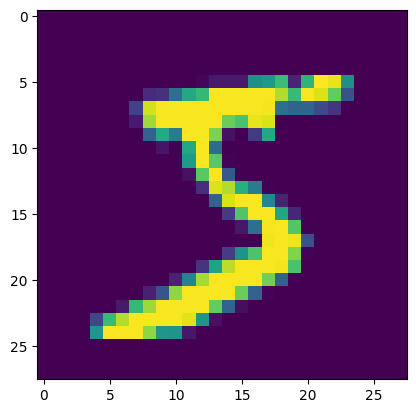

In [ ]:
plt.imshow(scaled_single)

In [ ]:
# reshaping the data to include the color channel

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

# Training the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1359 - accuracy: 0.9594 - val_loss: 0.0590 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0497 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0413 - val_accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0405 - val_accuracy: 0.9866


# Evaluation

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.135919,0.959367,0.059011,0.9792
1,0.047593,0.985517,0.049719,0.9848
2,0.030779,0.990233,0.035938,0.9887
3,0.019580,0.994083,0.041316,0.9876
4,0.014283,0.995250,0.040483,0.9866


<Axes: >

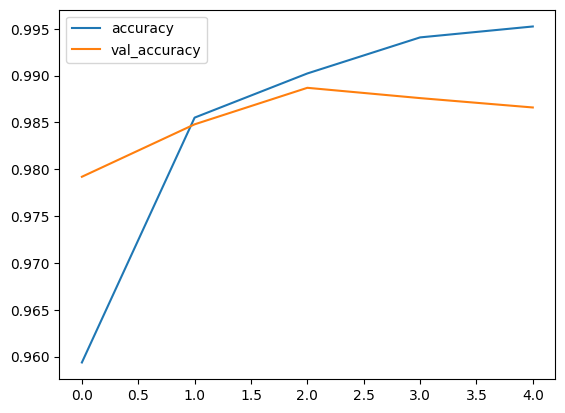

In [ ]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

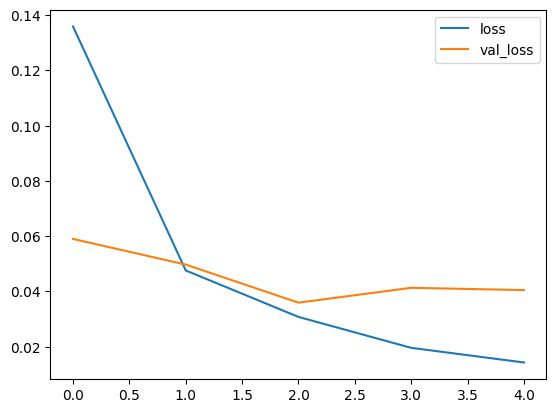

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.040482960641384125, 0.9865999817848206]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)

predictions = y_pred.argmax(axis=1)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.97      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 975    0    1    1    0    0    2    0    1    0]
 [   1 1129    1    1    1    0    1    1    0    0]
 [   1    3 1017    4    2    0    0    4    1    0]
 [   0    0    2 1004    0 

# Predictions

In [ ]:
my_number = x_test[0]

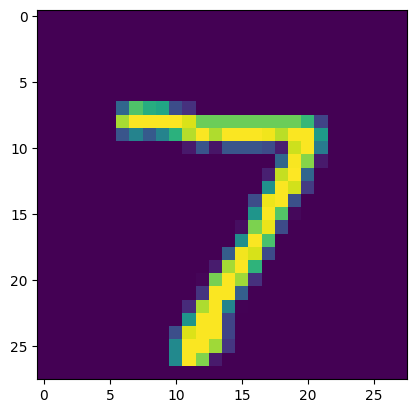

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
my_number=my_number.reshape(1,28,28,1)

In [ ]:
predicted_probabilities = model.predict(my_number)

predicted_class = predicted_probabilities.argmax()

print(predicted_class)


1/1 [==============================] - 0s 22ms/step
7


In [ ]:
print(predicted_class)

7
